In [1]:

import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

def show_res(csv_path):
  df = pd.read_csv(csv_path)

  # Parse nsw_exact_match strings into dictionaries
  df["nsw_exact_match"] = df["nsw_exact_match"].apply(ast.literal_eval)

  # Convert BLEU scores to numeric
  bleu_cols = ["bleu1", "bleu2", "bleu3", "bleu4"]
  for col in bleu_cols:
      df[col] = pd.to_numeric(df[col], errors="coerce")

  # Compute total correct sentences
  total_correct_sentences = df["exact_match"].sum()

  # Compute BLEU averages across all sentences
  bleu_averages = {f"BLEU-{i+1}": df[f"bleu{i+1}"].mean() for i in range(4)}

  # Compute accuracy per NSW type
  tag_scores = {}
  tag_counts = {}
  for nsw_dict in df["nsw_exact_match"]:
      for nsw, [tag, score] in nsw_dict.items():
          tag_scores.setdefault(tag, []).append(score)
          tag_counts.setdefault(tag, 0)
          tag_counts[tag] += 1

  # Calculate accuracy for each tag
  tag_accuracies = {tag: sum(scores) / len(scores) for tag, scores in tag_scores.items()}

  # Convert to DataFrame for NSW accuracy plot
  accuracy_df = pd.DataFrame.from_dict(tag_accuracies, orient="index", columns=["Accuracy"])
  accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False)

  # Plot NSW accuracy bar chart
  plt.figure(figsize=(8, 6))
  sns.barplot(x=accuracy_df.index, y=accuracy_df["Accuracy"], color="skyblue")
  plt.title("NSW Type Accuracy (Descending Order)")
  plt.xlabel("NSW Type")
  plt.ylabel("Accuracy")
  plt.ylim(0, 1.1)
  plt.xticks(rotation=45, ha="right")
  for i, v in enumerate(accuracy_df["Accuracy"]):
      plt.text(i, v + 0.02, f"{v:.2f}", ha="center")
  plt.tight_layout()
#   plt.savefig("nsw_accuracy_barchart.png", dpi=300, bbox_inches="tight")
  plt.show()

  # Convert BLEU averages to DataFrame for plot
  bleu_df = pd.DataFrame.from_dict(bleu_averages, orient="index", columns=["Average BLEU"])

  # Plot BLEU averages bar chart
  plt.figure(figsize=(8, 6))
  sns.barplot(x=bleu_df.index, y=bleu_df["Average BLEU"], color="lightgreen")
  plt.title("Average BLEU Scores Across All Sentences")
  plt.xlabel("BLEU Metric")
  plt.ylabel("Average Score")
  plt.ylim(0, 1.1)
  for i, v in enumerate(bleu_df["Average BLEU"]):
      plt.text(i, v + 0.02, f"{v:.2f}", ha="center")
  plt.tight_layout()
#   plt.savefig("bleu_averages_barchart.png", dpi=300, bbox_inches="tight")
  plt.show()

  # Print statistics
  print("\nNSW Type Accuracy Statistics:")
  for tag in accuracy_df.index:
      accuracy = tag_accuracies[tag]
      correct = sum(tag_scores[tag])
      total = tag_counts[tag]
      print(f"{tag}: {correct}/{total} correct, Accuracy = {accuracy:.2f}")

  print("\nBLEU Score Averages:")
  for bleu_metric, avg in bleu_averages.items():
      print(f"{bleu_metric}: {avg:.2f}")

  print(f"\nTotal Correct Sentences: {total_correct_sentences}/{len(df)}")


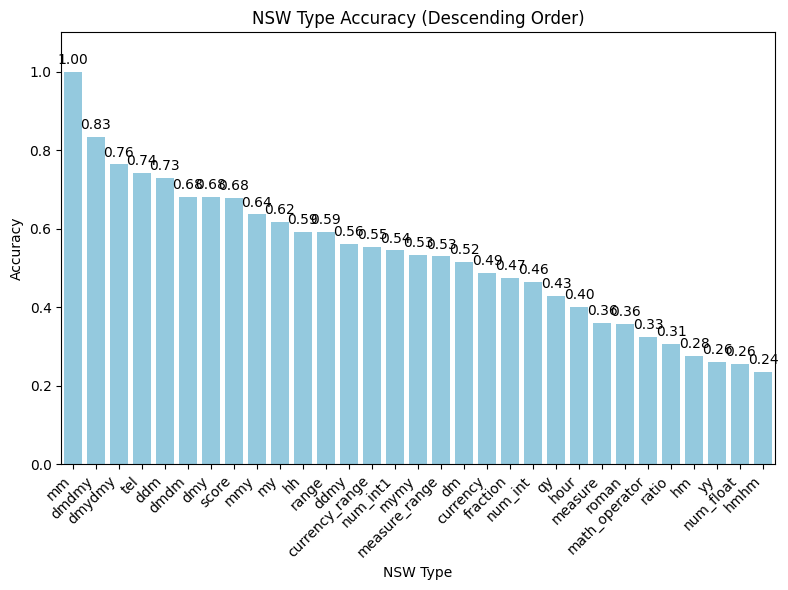

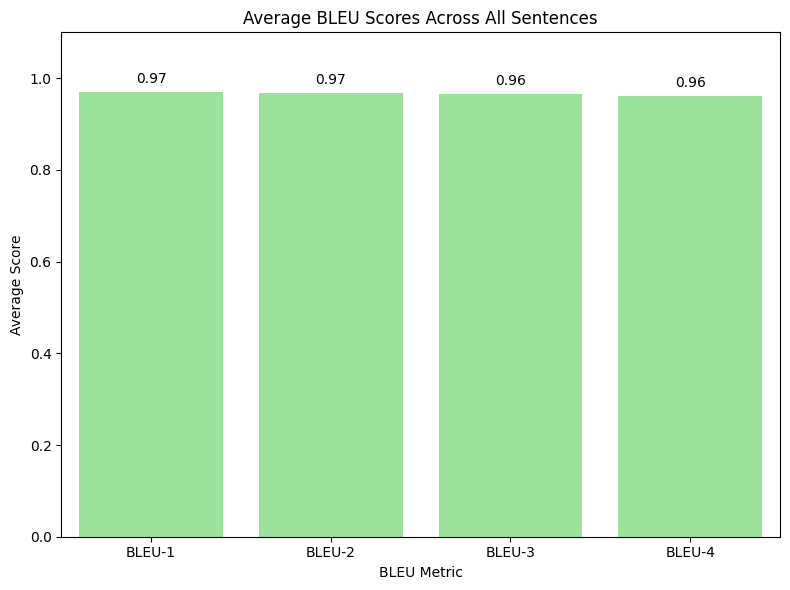


NSW Type Accuracy Statistics:
mm: 10/10 correct, Accuracy = 1.00
dmdmy: 15/18 correct, Accuracy = 0.83
dmydmy: 42/55 correct, Accuracy = 0.76
tel: 43/58 correct, Accuracy = 0.74
ddm: 35/48 correct, Accuracy = 0.73
dmdm: 34/50 correct, Accuracy = 0.68
dmy: 51/75 correct, Accuracy = 0.68
score: 40/59 correct, Accuracy = 0.68
mmy: 7/11 correct, Accuracy = 0.64
my: 45/73 correct, Accuracy = 0.62
hh: 29/49 correct, Accuracy = 0.59
range: 52/88 correct, Accuracy = 0.59
ddmy: 23/41 correct, Accuracy = 0.56
currency_range: 26/47 correct, Accuracy = 0.55
num_int1: 79/145 correct, Accuracy = 0.54
mymy: 8/15 correct, Accuracy = 0.53
measure_range: 36/68 correct, Accuracy = 0.53
dm: 97/188 correct, Accuracy = 0.52
currency: 38/78 correct, Accuracy = 0.49
fraction: 19/40 correct, Accuracy = 0.47
num_int: 423/912 correct, Accuracy = 0.46
qy: 21/49 correct, Accuracy = 0.43
hour: 4/10 correct, Accuracy = 0.40
measure: 74/205 correct, Accuracy = 0.36
roman: 20/56 correct, Accuracy = 0.36
math_operator

In [2]:
file = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-16/01:23:35_2025-06-07_vn-llama3.2-3b-augmented-2025-06-07_1_eval.csv"
show_res(file)

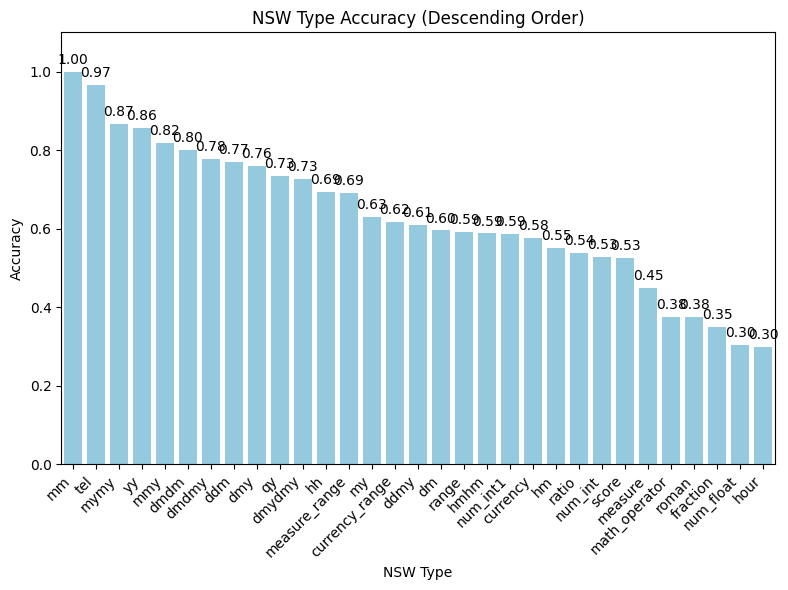

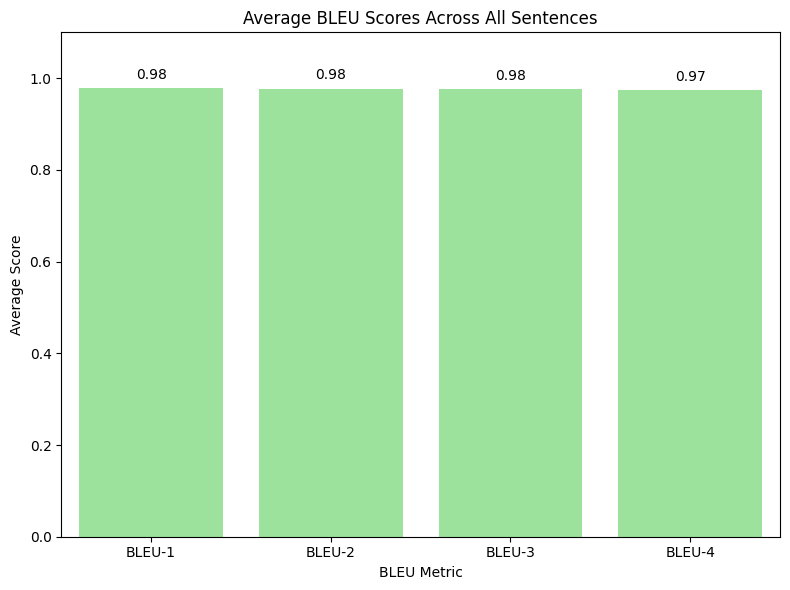


NSW Type Accuracy Statistics:
mm: 10/10 correct, Accuracy = 1.00
tel: 56/58 correct, Accuracy = 0.97
mymy: 13/15 correct, Accuracy = 0.87
yy: 36/42 correct, Accuracy = 0.86
mmy: 9/11 correct, Accuracy = 0.82
dmdm: 40/50 correct, Accuracy = 0.80
dmdmy: 14/18 correct, Accuracy = 0.78
ddm: 37/48 correct, Accuracy = 0.77
dmy: 57/75 correct, Accuracy = 0.76
qy: 36/49 correct, Accuracy = 0.73
dmydmy: 40/55 correct, Accuracy = 0.73
hh: 34/49 correct, Accuracy = 0.69
measure_range: 47/68 correct, Accuracy = 0.69
my: 46/73 correct, Accuracy = 0.63
currency_range: 29/47 correct, Accuracy = 0.62
ddmy: 25/41 correct, Accuracy = 0.61
dm: 112/188 correct, Accuracy = 0.60
range: 52/88 correct, Accuracy = 0.59
hmhm: 10/17 correct, Accuracy = 0.59
num_int1: 85/145 correct, Accuracy = 0.59
currency: 45/78 correct, Accuracy = 0.58
hm: 32/58 correct, Accuracy = 0.55
ratio: 7/13 correct, Accuracy = 0.54
num_int: 481/912 correct, Accuracy = 0.53
score: 31/59 correct, Accuracy = 0.53
measure: 92/205 correct

In [3]:
file = "/data/datnt3/text-normalization/data_storage/eval/hybrid_inference/2025-06-16/01:18:14_2025-06-07_vn-llama3.2-3b-augmented-2025-06-07_1_eval.csv"
show_res(file)

# llama 1b

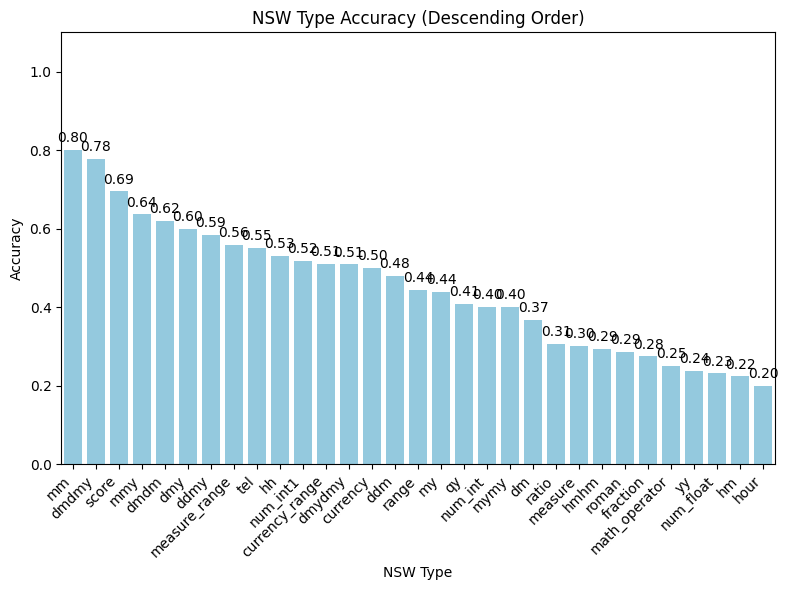

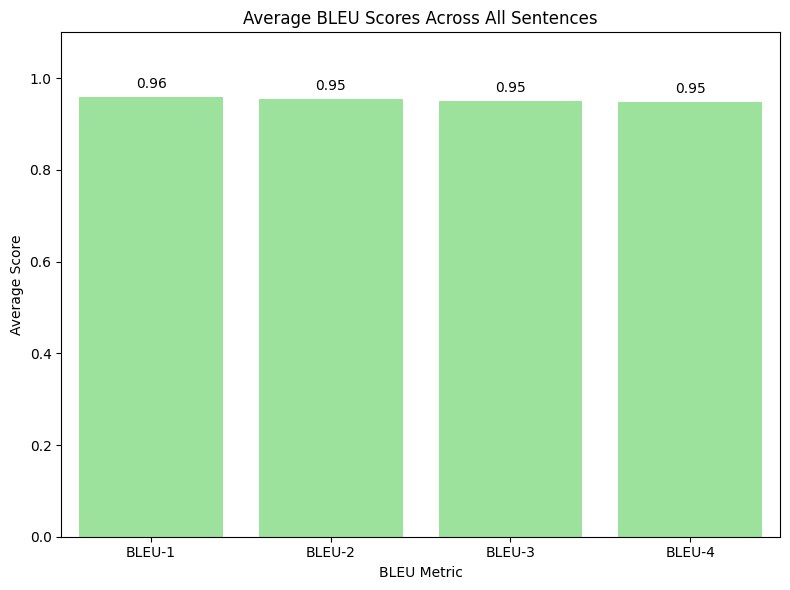


NSW Type Accuracy Statistics:
mm: 8/10 correct, Accuracy = 0.80
dmdmy: 14/18 correct, Accuracy = 0.78
score: 41/59 correct, Accuracy = 0.69
mmy: 7/11 correct, Accuracy = 0.64
dmdm: 31/50 correct, Accuracy = 0.62
dmy: 45/75 correct, Accuracy = 0.60
ddmy: 24/41 correct, Accuracy = 0.59
measure_range: 38/68 correct, Accuracy = 0.56
tel: 32/58 correct, Accuracy = 0.55
hh: 26/49 correct, Accuracy = 0.53
num_int1: 75/145 correct, Accuracy = 0.52
currency_range: 24/47 correct, Accuracy = 0.51
dmydmy: 28/55 correct, Accuracy = 0.51
currency: 39/78 correct, Accuracy = 0.50
ddm: 23/48 correct, Accuracy = 0.48
range: 39/88 correct, Accuracy = 0.44
my: 32/73 correct, Accuracy = 0.44
qy: 20/49 correct, Accuracy = 0.41
num_int: 365/912 correct, Accuracy = 0.40
mymy: 6/15 correct, Accuracy = 0.40
dm: 69/188 correct, Accuracy = 0.37
ratio: 4/13 correct, Accuracy = 0.31
measure: 62/205 correct, Accuracy = 0.30
hmhm: 5/17 correct, Accuracy = 0.29
roman: 16/56 correct, Accuracy = 0.29
fraction: 11/40 co

In [4]:
file = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-16/02:05:17_2025-06-07_vn-llama3.2-1b-augmented-2025-06-07_1_eval.csv"
show_res(file)

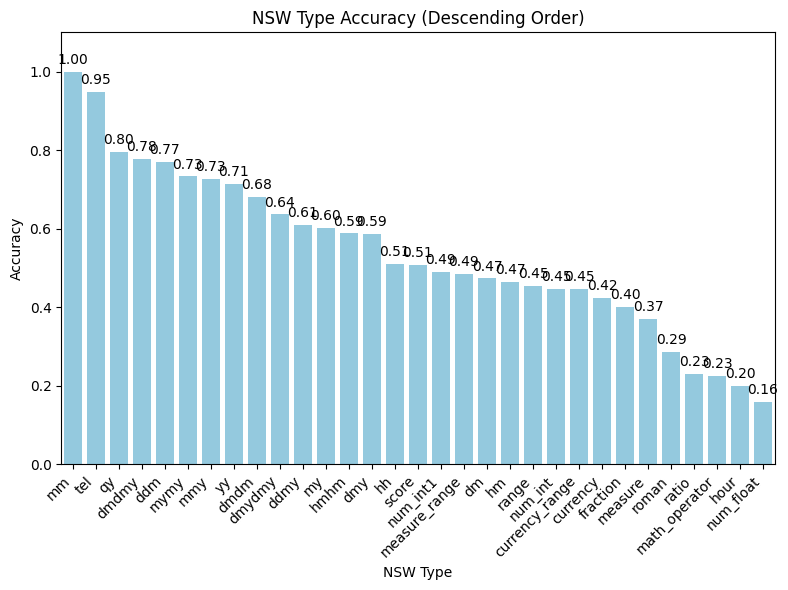

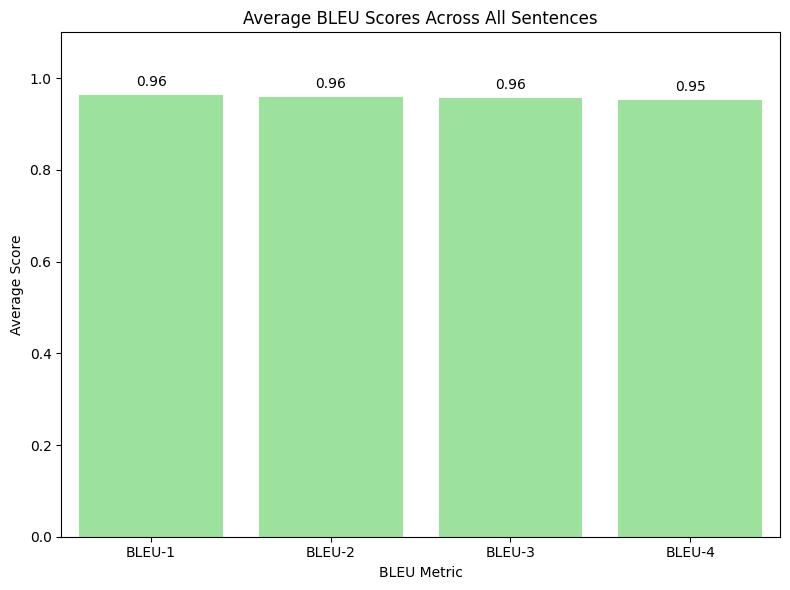


NSW Type Accuracy Statistics:
mm: 10/10 correct, Accuracy = 1.00
tel: 55/58 correct, Accuracy = 0.95
qy: 39/49 correct, Accuracy = 0.80
dmdmy: 14/18 correct, Accuracy = 0.78
ddm: 37/48 correct, Accuracy = 0.77
mymy: 11/15 correct, Accuracy = 0.73
mmy: 8/11 correct, Accuracy = 0.73
yy: 30/42 correct, Accuracy = 0.71
dmdm: 34/50 correct, Accuracy = 0.68
dmydmy: 35/55 correct, Accuracy = 0.64
ddmy: 25/41 correct, Accuracy = 0.61
my: 44/73 correct, Accuracy = 0.60
hmhm: 10/17 correct, Accuracy = 0.59
dmy: 44/75 correct, Accuracy = 0.59
hh: 25/49 correct, Accuracy = 0.51
score: 30/59 correct, Accuracy = 0.51
num_int1: 71/145 correct, Accuracy = 0.49
measure_range: 33/68 correct, Accuracy = 0.49
dm: 89/188 correct, Accuracy = 0.47
hm: 27/58 correct, Accuracy = 0.47
range: 40/88 correct, Accuracy = 0.45
num_int: 408/912 correct, Accuracy = 0.45
currency_range: 21/47 correct, Accuracy = 0.45
currency: 33/78 correct, Accuracy = 0.42
fraction: 16/40 correct, Accuracy = 0.40
measure: 76/205 corr

In [5]:
file = "/data/datnt3/text-normalization/data_storage/eval/hybrid_inference/2025-06-16/02:05:51_2025-06-07_vn-llama3.2-1b-augmented-2025-06-07_1_eval.csv"
show_res(file)

In [ ]:
dm: 89/188 correct, Accuracy = 0.47  
dmy: 44/75 correct, Accuracy = 0.59  
my: 44/73 correct, Accuracy = 0.60  
qy: 39/49 correct, Accuracy = 0.80  
ddm: 37/48 correct, Accuracy = 0.77  
ddmy: 25/41 correct, Accuracy = 0.61  
dmdm: 34/50 correct, Accuracy = 0.68  
dmdmy: 14/18 correct, Accuracy = 0.78  
dmydmy: 35/55 correct, Accuracy = 0.64  
mymy: 11/15 correct, Accuracy = 0.73  
mmy: 8/11 correct, Accuracy = 0.73  
mm: 10/10 correct, Accuracy = 1.00  
yy: 30/42 correct, Accuracy = 0.71  
hm: 27/58 correct, Accuracy = 0.47  
h (hour): 2/10 correct, Accuracy = 0.20  
hmhm: 10/17 correct, Accuracy = 0.59  
hh: 25/49 correct, Accuracy = 0.51  
measure_range: 33/68 correct, Accuracy = 0.49  
measure: 76/205 correct, Accuracy = 0.37  
num_float: 13/82 correct, Accuracy = 0.16  
num_range (range): 40/88 correct, Accuracy = 0.45  
num_int: 408/912 correct, Accuracy = 0.45  
num_int1: 71/145 correct, Accuracy = 0.49  
currency: 33/78 correct, Accuracy = 0.42  
currency_range: 21/47 correct, Accuracy = 0.45  
tel: 55/58 correct, Accuracy = 0.95  
roman: 16/56 correct, Accuracy = 0.29  
score: 30/59 correct, Accuracy = 0.51  
fraction: 16/40 correct, Accuracy = 0.40  
ratio: 3/13 correct, Accuracy = 0.23  
